<a href="https://colab.research.google.com/github/student-monika/Marvel_tasks_Level_2/blob/main/Anomaly_detection_LOF_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We detect unusual transaction amounts — like very small or very large payments — using Local Outlier Factor (LOF), a technique that identifies points that differ from their neighbors.

Unsupervised Anomaly algorithm - LOF

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score

In [7]:
normal_data = np.random.randint(500, 2000, size=(40, 1))

anomalies = np.array([[50], [80], [5000], [7000]])

transactions = np.vstack((normal_data, anomalies))

true_labels = np.array([1]*40 + [-1]*4)

In [8]:
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

predictions = lof.fit_predict(transactions)  # 1 = normal, -1 = outlier


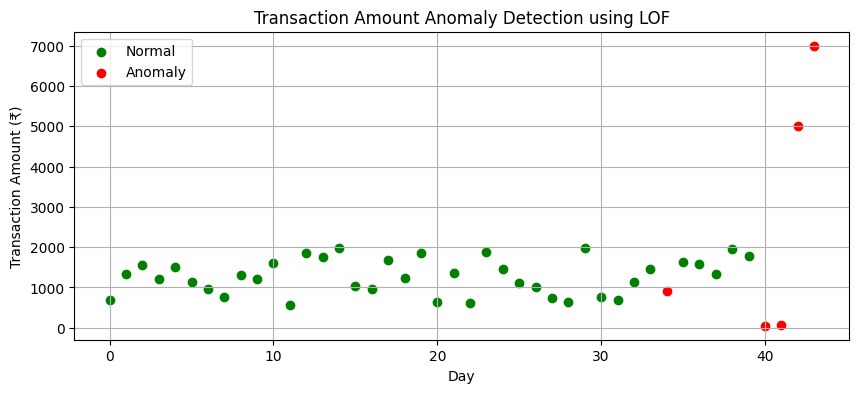

Accuracy: 0.9772727272727273


In [9]:
plt.figure(figsize=(10, 4))

plt.scatter(np.arange(len(transactions))[predictions == 1],
            transactions[predictions == 1], color='green', label='Normal')

plt.scatter(np.arange(len(transactions))[predictions == -1],
            transactions[predictions == -1], color='red', label='Anomaly')

plt.title("Transaction Amount Anomaly Detection using LOF")
plt.xlabel("Day")
plt.ylabel("Transaction Amount (₹)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy:", accuracy_score(true_labels, predictions))

Supervised Anomaly Algorithm - SVM

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

In [43]:
normal_data = np.random.randint(500, 2000, size=(40, 1))

anomalies = np.array([[50], [80], [5000], [7000]])

transactions = np.vstack((normal_data, anomalies))

true_labels = np.array([1]*40 + [-1]*4)

In [44]:
scaler = StandardScaler()
transactions_scaled = scaler.fit_transform(transactions)

In [45]:
svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)
svm_model.fit(transactions_scaled)

OneClassSVM(gamma='auto', nu=0.1)

In [47]:
predictions = svm_model.predict(transactions_scaled)

print("Accuracy:",accuracy_score(true_labels, predictions))

Accuracy: 0.9318181818181818


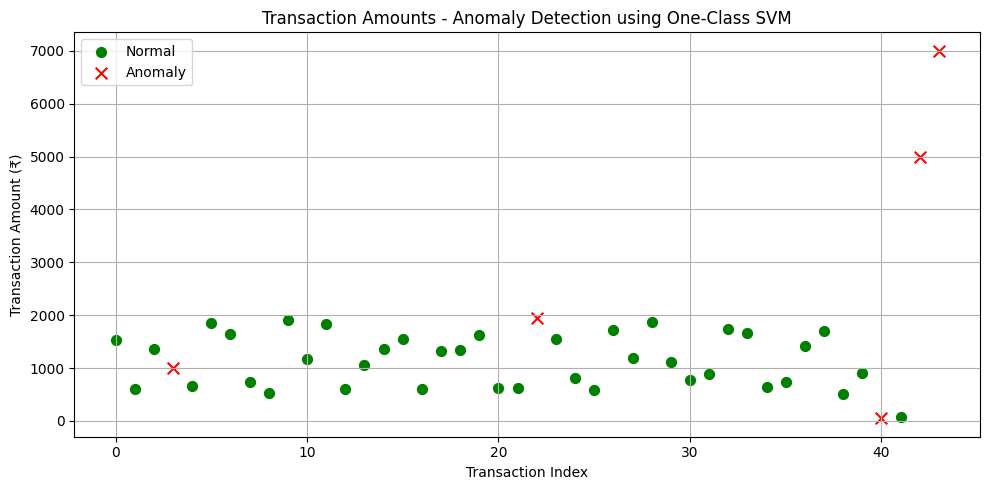

In [48]:
transactions_original = scaler.inverse_transform(transactions_scaled)

plt.figure(figsize=(10, 5))
plt.title("Transaction Amounts - Anomaly Detection using One-Class SVM")
plt.xlabel("Transaction Index")
plt.ylabel("Transaction Amount (₹)")

plt.scatter(np.arange(len(transactions))[predictions == 1],
            transactions_original[predictions == 1],
            color='green', label='Normal', s=50)

plt.scatter(np.arange(len(transactions))[predictions == -1],
            transactions_original[predictions == -1],
            color='red', label='Anomaly', s=70, marker='x')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()